In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
usa

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [3]:
usa = pd.read_csv('houseprediction.csv')

In [4]:
usa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
usa.pop('Address')

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 5000, dtype: object

In [6]:
usa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [7]:
y=usa['Price']
X=usa[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

<AxesSubplot: xlabel='Price', ylabel='Count'>

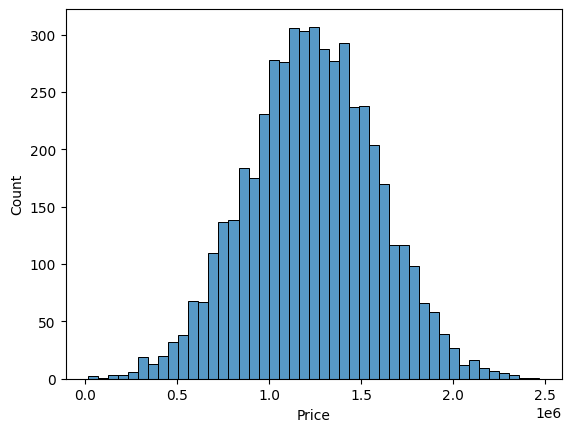

In [8]:
sb.histplot(usa['Price'])

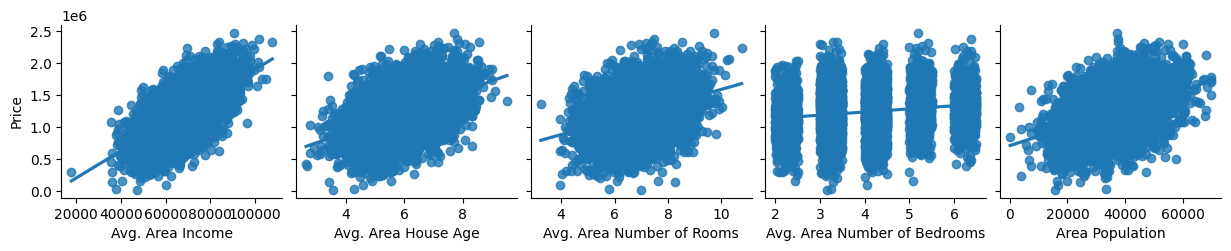

In [9]:
sb.pairplot(usa, x_vars = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'], y_vars = 'Price', kind = 'reg')
pt.show()

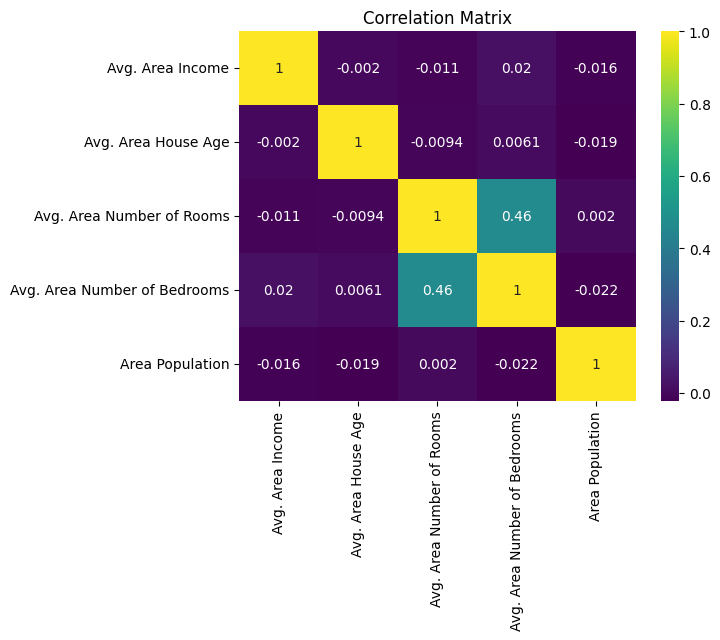

In [10]:
co_matrix = usa[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']].corr()
sb.heatmap(co_matrix, annot = True, cmap = 'viridis')
pt.title('Correlation Matrix')
pt.show()

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)
usalr = LinearRegression()
usalr.fit(Xtrain,ytrain)

LinearRegression()

In [12]:
usalr.coef_

array([2.16921710e+01, 1.65568718e+05, 1.20915890e+05, 1.37110312e+03,
       1.52204495e+01])

In [13]:
pd.DataFrame(usalr.coef_,index=X.columns,columns=['mycoef'])

,mycoef
Avg. Area Income,21.692171
Avg. Area House Age,165568.718264
Avg. Area Number of Rooms,120915.889534
Avg. Area Number of Bedrooms,1371.103123
Area Population,15.220449


In [14]:
pr = usalr.predict(Xtest)


In [15]:
r2_score(ytest,pr)

0.9166336310335401

In [16]:
mean_absolute_error(ytest,pr)

82556.2995319139

In [17]:
mean_squared_error(ytest,pr)

10304213002.32656

In [20]:
i = float(input('Enter Average Area Income: '))
a = float(input('Enter Average Area House Age: '))
r = float(input('Enter Average Area Number of Rooms: '))
br = float(input('Enter Average Area Number of Bedrooms: '))
p = float(input('Enter Area Population: '))
print('The predicted House Price is:' ,float(usalr.predict([[i, a, r, br, p]])[0]))

Enter Average Area Income:  600
Enter Average Area House Age:  600
Enter Average Area Number of Rooms:  6
Enter Average Area Number of Bedrooms:  5
Enter Area Population:  600


The predicted House Price is: 97449816.11179534


C:\Users\shary\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
